In [ ]:
!wget --header="Host: datahack-prod.s3.amazonaws.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://datahack.analyticsvidhya.com/contest/janatahack-machine-learning-in-agriculture/" "https://datahack-prod.s3.amazonaws.com/train_file/train_yaOffsB.csv" -c -O 'train.csv'

--2020-07-26 03:20:09--  https://datahack-prod.s3.amazonaws.com/train_file/train_yaOffsB.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.124
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2997136 (2.9M) [text/csv]
Saving to: ‘train.csv’

train.csv           100%[===================>]   2.86M  1.65MB/s    in 1.7s    

2020-07-26 03:20:11 (1.65 MB/s) - ‘train.csv’ saved [2997136/2997136]



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# ID	: UniqueID
# Estimated_Insects_Count	: Estimated insects count per square meter
# Crop_Type :	Category of Crop(0,1)
# Soil_Type	: Category of Soil (0,1)
# Pesticide_Use_Category : Type of pesticides uses (1- Never, 2-Previously Used, 3-Currently Using)
# Number_Doses_Week :	Number of doses per week
# Number_Weeks_Used	: Number of weeks used
# Number_Weeks_Quit	: Number of weeks quit
# Season :	Season Category (1,2,3)
# Crop_Damage	: Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)

train = pd.read_csv("train.csv")
train['Estimated_Insects_Count_per_km_sq'] = train['Estimated_Insects_Count'].apply(lambda x:x*0.000001) 

from sklearn.linear_model import LinearRegression,LogisticRegression
from lightgbm import LGBMRegressor,LGBMClassifier
from xgboost import XGBRegressor,XGBClassifier
from sklearn.model_selection import train_test_split

imputer = LGBMRegressor()
use_train = train.dropna()
X = use_train.drop(['ID','Number_Weeks_Used','Crop_Damage'],axis=1)
Y = use_train[['Number_Weeks_Used']]
impute_train_x,impute_test_x,impute_train_y,impute_test_y = train_test_split(X,Y,test_size=0.2,shuffle=True)
imputer.fit(impute_train_x,impute_train_y)
print(imputer.score(impute_test_x,impute_test_y))

imputer.fit(X,Y)

na_train = train[train.Number_Weeks_Used.isna()]
output = imputer.predict(na_train.drop(['ID','Number_Weeks_Used','Crop_Damage'],axis=1))
na_train['Number_Weeks_Used'] = output

train = pd.concat([use_train,na_train])

train

# def factorize(column , df):
#   m = pd.get_dummies(df[column])
#   new_cols = []
#   for i in m.columns:
#     new_cols.append((i,f"{column}_{i}"))
#   m = m.rename(columns=dict(new_cols))
#   df = df.merge(m,left_index=True,right_index=True).drop([column],axis=1)
#   return df

# for col in ['Crop_Type','Soil_Type','Season','Pesticide_Use_Category']:
#   train = factorize(col,train)
# train

0.7162397502493745


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Estimated_Insects_Count_per_km_sq
0,F00000001,188,1,0,1,0,0.000000,0,1,0,0.000188
1,F00000003,209,1,0,1,0,0.000000,0,2,1,0.000209
2,F00000004,257,1,0,1,0,0.000000,0,2,1,0.000257
3,F00000005,257,1,1,1,0,0.000000,0,2,1,0.000257
4,F00000006,342,1,0,1,0,0.000000,0,2,1,0.000342
...,...,...,...,...,...,...,...,...,...,...,...
88786,F00155793,1785,1,0,2,60,30.443290,16,2,0,0.001785
88788,F00155801,1898,1,0,2,15,38.277550,3,1,0,0.001898
88825,F00155882,2542,1,0,2,10,25.470670,21,2,0,0.002542
88833,F00155899,2687,1,0,2,10,26.348323,21,2,0,0.002687


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88858 entries, 0 to 88838
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 88858 non-null  object 
 1   Estimated_Insects_Count            88858 non-null  int64  
 2   Crop_Type                          88858 non-null  int64  
 3   Soil_Type                          88858 non-null  int64  
 4   Pesticide_Use_Category             88858 non-null  int64  
 5   Number_Doses_Week                  88858 non-null  int64  
 6   Number_Weeks_Used                  88858 non-null  float64
 7   Number_Weeks_Quit                  88858 non-null  int64  
 8   Season                             88858 non-null  int64  
 9   Crop_Damage                        88858 non-null  int64  
 10  Estimated_Insects_Count_per_km_sq  88858 non-null  float64
dtypes: float64(2), int64(8), object(1)
memory usage: 8.1+ 

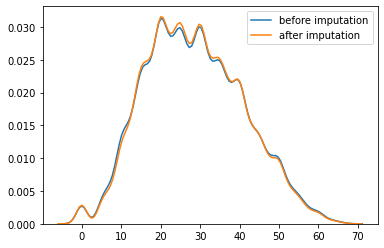

In [ ]:
# sns.distplot(train.Estimated_Insects_Count)
# sns.kdeplot(na_train.Number_Weeks_Used,label="imputed")
sns.kdeplot(use_train.Number_Weeks_Used,label="before imputation")
sns.kdeplot(train.Number_Weeks_Used,label="after imputation")

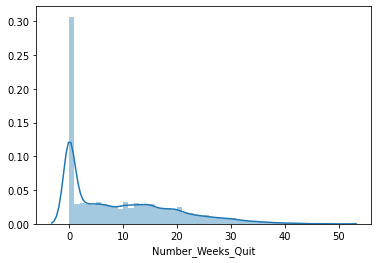

In [ ]:
sns.distplot(train.Number_Weeks_Quit)

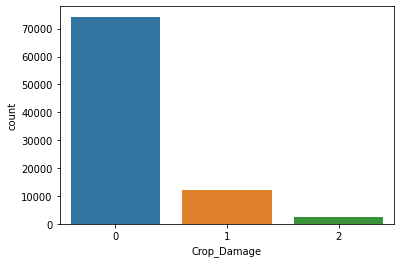

In [ ]:
sns.countplot(train.Crop_Damage)

In [ ]:
!pip install catboost

     |████████████████████████████████| 64.8MB 67kB/s 


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split , KFold

In [ ]:
from sklearn.utils import class_weight
y = train[['Crop_Damage']].values.reshape((-1))
class_weights = class_weight.compute_class_weight('balanced',np.unique(y),y)
class_weights

array([ 0.39897806,  2.40670621, 12.80559158])

In [ ]:
train_x,val_x = train_test_split(train,test_size=0.2,shuffle=True)

x_train = train_x.drop(['ID','Crop_Damage'],axis=1)
y_train = train_x[['Crop_Damage']]

x_val = val_x.drop(['ID','Crop_Damage'],axis=1)
y_val = val_x[['Crop_Damage']]

params={
    "od_type":"Iter",
    "od_wait":25,
    "eval_metric":"Accuracy",
    "verbose":50
}

# model= CatBoostClassifier(**params)
# model.fit(x_train,y_train,
#           cat_features=["Crop_Type",'Soil_Type','Pesticide_Use_Category','Season'],
#           eval_set=(x_val,y_val))
# print("Catboost Score : ",model.score(x_val,y_val))

# for x_model in [LGBMClassifier(),XGBClassifier()]:
#   x_model.fit(x_train,y_train,)
#   print(f"{str(x_model)[:15]} Score : ",x_model.score(x_val,y_val))
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(150,64))
mlp.fit(x_train,y_train)
mlp.score(x_val,y_val)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
pd.DataFrame(list(zip(x_train.columns,model.feature_importances_)),columns=['Feature','Importance'])

,Feature,Importance
0,Estimated_Insects_Count,0.118569
1,Crop_Type,0.075211
2,Soil_Type,0.042412
3,Pesticide_Use_Category,0.336493
4,Number_Doses_Week,0.072970
5,Number_Weeks_Used,0.192392
6,Number_Weeks_Quit,0.151941
7,Season,0.010013
8,Estimated_Insects_Count_per_km_sq,0.000000


In [ ]:
import os
if not os.path.exists("test.csv"):
  !wget --header="Host: datahack-prod.s3.amazonaws.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://datahack.analyticsvidhya.com/contest/janatahack-machine-learning-in-agriculture/" "https://datahack-prod.s3.amazonaws.com/test_file/test_pFkWwen.csv" -c -O 'test.csv'

In [ ]:
test = pd.read_csv("test.csv")
test['Estimated_Insects_Count_per_km_sq'] = test['Estimated_Insects_Count'].apply(lambda x:x*0.000001) 
use_test = test.dropna()
na_test = test[test.Number_Weeks_Used.isna()]
na_test['Number_Weeks_Used'] = imputer.predict(na_test.drop(['ID','Number_Weeks_Used'],axis=1))
test = pd.concat([use_test,na_test])
test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Estimated_Insects_Count_per_km_sq
1,F00000007,410,1,1,1,0,0.000000,0,2,0.000410
2,F00000011,626,1,0,1,0,0.000000,0,2,0.000626
3,F00000013,731,1,0,1,0,0.000000,0,2,0.000731
4,F00000014,789,0,0,1,0,0.000000,0,1,0.000789
5,F00000015,851,0,1,1,0,0.000000,0,2,0.000851
...,...,...,...,...,...,...,...,...,...,...
59270,F00155852,2138,1,0,2,50,41.063414,8,2,0.002138
59273,F00155861,2267,1,0,2,20,43.987250,1,1,0.002267
59280,F00155876,2401,1,0,2,30,42.916138,6,2,0.002401
59282,F00155885,2542,1,0,2,10,41.228577,1,1,0.002542


In [ ]:
predictions = model.predict(test.drop(['ID'],axis=1))
test['Crop_Damage'] = predictions
submission = test[['ID','Crop_Damage']]
submission.to_csv("catboost_v1.csv",index=False)
submission

,ID,Crop_Damage
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,1
5,F00000015,1
...,...,...
59270,F00155852,0
59273,F00155861,0
59280,F00155876,0
59282,F00155885,0
